In [24]:
# 1. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk mempercantik tampilan chart
sns.set_style("whitegrid")

# 2. Load dataset Food Price Inflation
df = pd.read_csv("/home/sita/Downloads/food_inflation.csv") 
print("Shape dataset:", df.shape)
df.head()


Shape dataset: (59839, 4)


,REF_AREA,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE
0,AFG,Afghanistan,2001-01-01,22.943765
1,AFG,Afghanistan,2001-02-01,24.357903
2,AFG,Afghanistan,2001-03-01,21.202933
3,AFG,Afghanistan,2001-04-01,17.301832
4,AFG,Afghanistan,2001-05-01,9.334624


In [25]:
# 3. (Opsional) Cek missing value
print(df.isna().sum())


REF_AREA          0
REF_AREA_LABEL    0
TIME_PERIOD       0
OBS_VALUE         0
dtype: int64


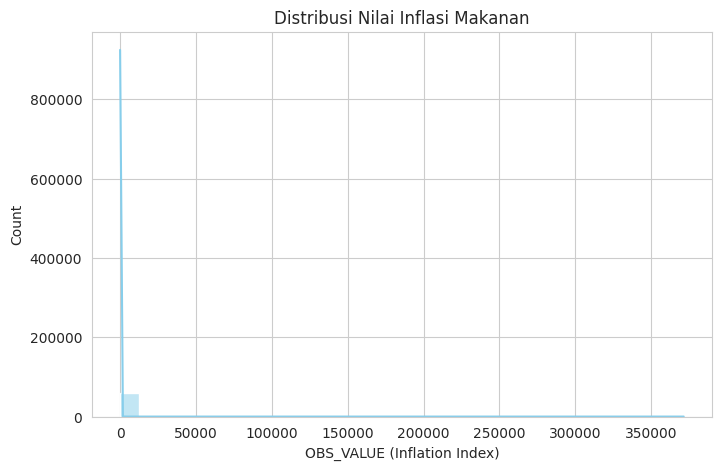

In [26]:
# 4. DISTRIBUSI NILAI INFLASI
plt.figure(figsize=(8,5))
sns.histplot(df['OBS_VALUE'], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Nilai Inflasi Makanan")
plt.xlabel("OBS_VALUE (Inflation Index)")
plt.ylabel("Count")
plt.show()


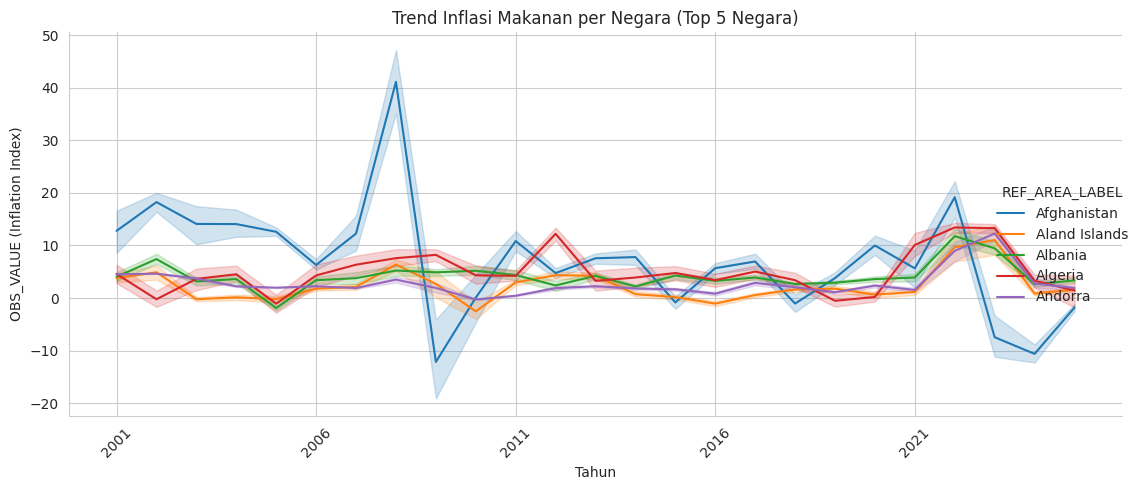

In [28]:
# 5. TREND INFLASI PER NEGARA

# Ambil 5 negara dengan data terbanyak
top_countries = df['REF_AREA_LABEL'].value_counts().nlargest(5).index
df_top = df[df['REF_AREA_LABEL'].isin(top_countries)].copy()

# Pastikan TIME_PERIOD hanya tahun saja
df_top['TIME_PERIOD'] = pd.to_datetime(df_top['TIME_PERIOD']).dt.year

# Plot memakai relplot (figure-level)
g = sns.relplot(
    data=df_top,
    x="TIME_PERIOD",
    y="OBS_VALUE",
    kind="line",
    hue="REF_AREA_LABEL",
    height=5,
    aspect=2
)

# Ambil axis dari relplot
ax = g.ax

# Batasi tampilan tahun (setiap 5 tahun)
years = sorted(df_top['TIME_PERIOD'].unique())
ax.set_xticks(years[::5])
ax.set_xticklabels(years[::5], rotation=45)

# Tambahkan judul dan label sumbu
ax.set_title("Trend Inflasi Makanan per Negara (Top 5 Negara)")
ax.set_xlabel("Tahun")
ax.set_ylabel("OBS_VALUE (Inflation Index)")

plt.tight_layout()
plt.show()


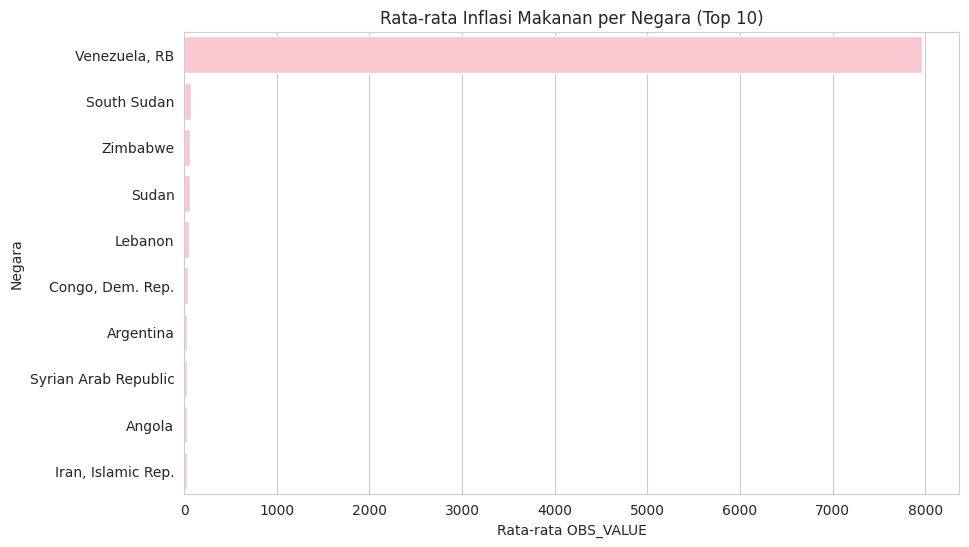

In [33]:
# 6. PERBANDINGAN NILAI INFLASI RATA-RATA PER NEGARA

avg_country = df.groupby('REF_AREA_LABEL')['OBS_VALUE'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(x=avg_country.values, y=avg_country.index, color="pink")
plt.title("Rata-rata Inflasi Makanan per Negara (Top 10)")
plt.xlabel("Rata-rata OBS_VALUE")
plt.ylabel("Negara")
plt.show()


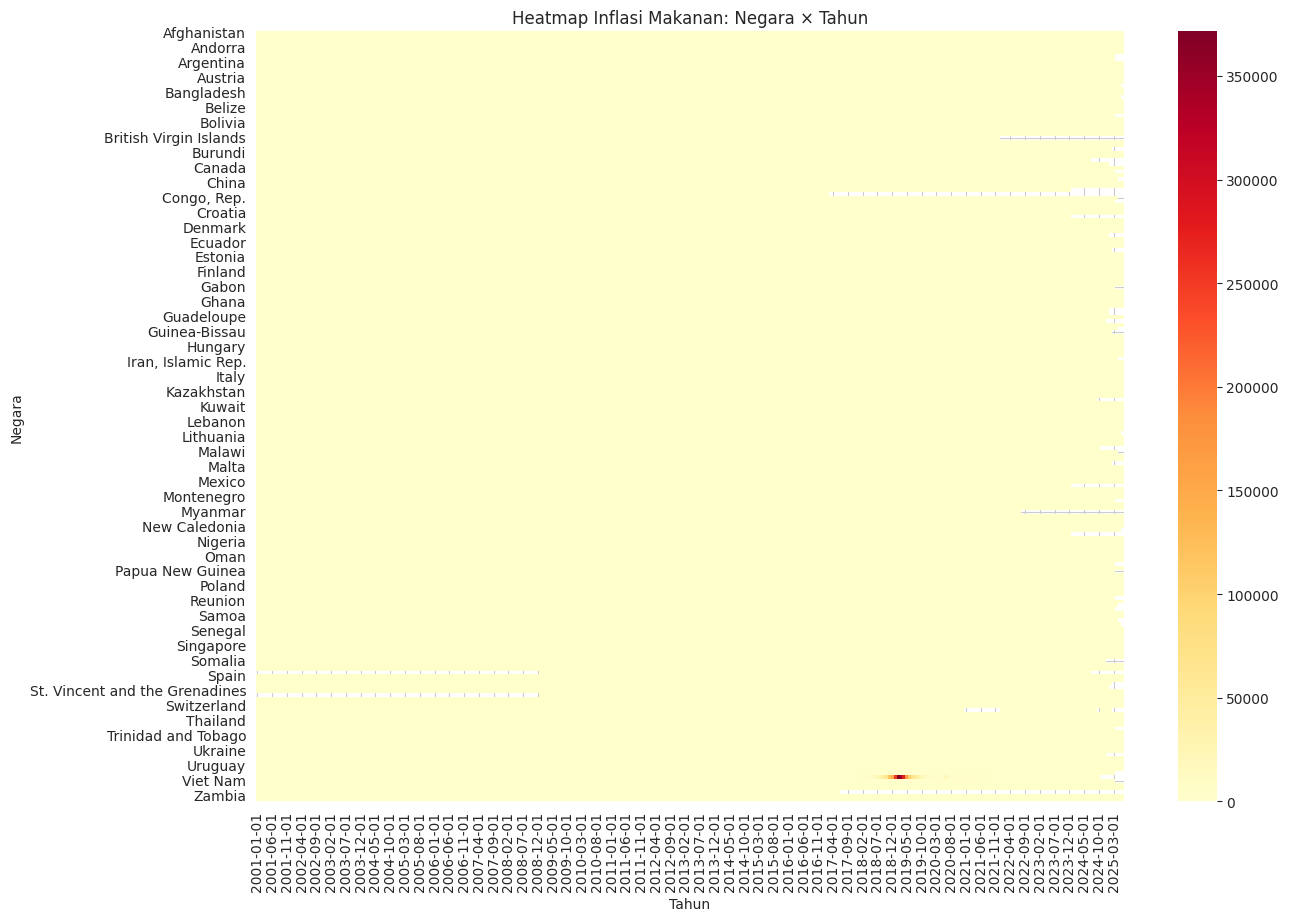

In [37]:
# 7. HEATMAP NEGARA × TAHUN

pivot_df = df.pivot_table(
    index="REF_AREA_LABEL",
    columns="TIME_PERIOD",
    values="OBS_VALUE"
)

plt.figure(figsize=(14,10))
sns.heatmap(pivot_df, cmap="YlOrRd")
plt.title("Heatmap Inflasi Makanan: Negara × Tahun")
plt.xlabel("Tahun")
plt.ylabel("Negara")
plt.show()


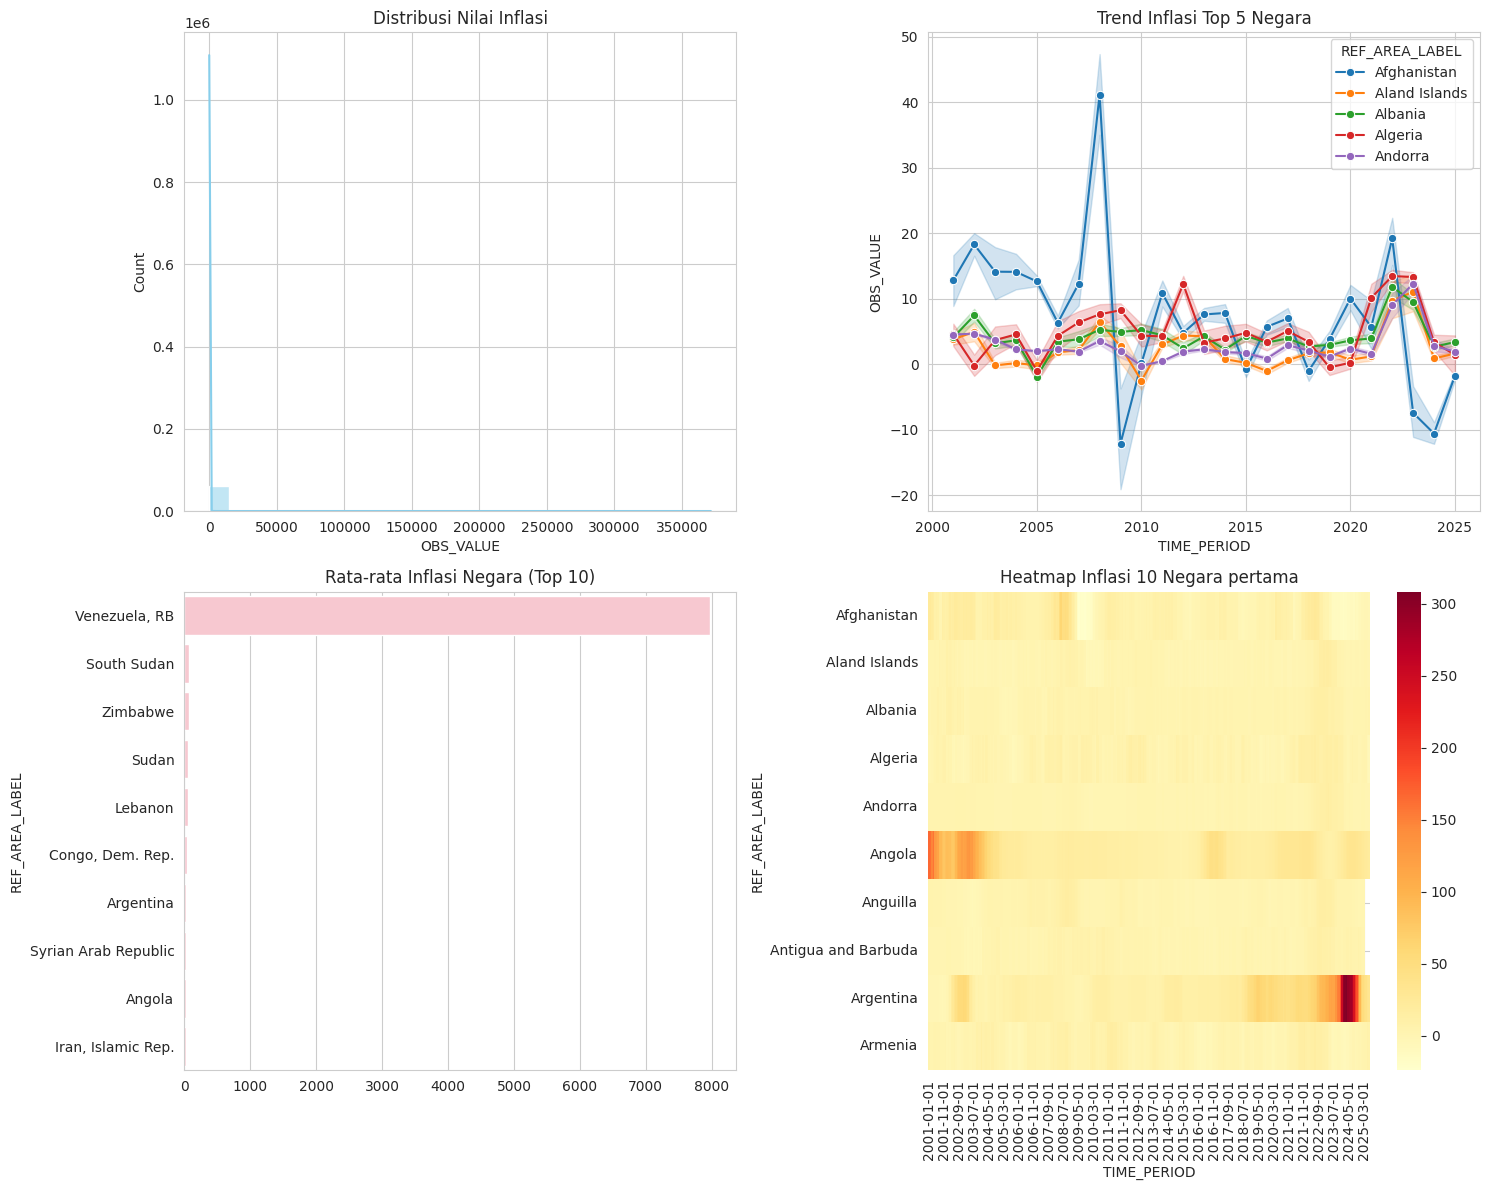

In [36]:
# 8. DASHBOARD DENGAN 4 PLOT

fig, ax = plt.subplots(2, 2, figsize=(15,12))

# Plot 1 — Distribusi
sns.histplot(df['OBS_VALUE'], bins=25, kde=True, color="skyblue", ax=ax[0,0])
ax[0,0].set_title("Distribusi Nilai Inflasi")

# Plot 2 — Trend (negara top)
sns.lineplot(data=df_top, x='TIME_PERIOD', y='OBS_VALUE',
             hue='REF_AREA_LABEL', marker='o', ax=ax[0,1])
ax[0,1].set_title("Trend Inflasi Top 5 Negara")

# Plot 3 — Rata-rata inflasi negara
sns.barplot(x=avg_country.values, y=avg_country.index, color="pink", ax=ax[1,0])
ax[1,0].set_title("Rata-rata Inflasi Negara (Top 10)")

# Plot 4 — Heatmap
sns.heatmap(pivot_df.head(10), cmap="YlOrRd", ax=ax[1,1])
ax[1,1].set_title("Heatmap Inflasi 10 Negara pertama")

plt.tight_layout()
plt.show()
